In [36]:
api_key= '69e148611d200c7e3a489912f074fcef'

url='https://api.themoviedb.org/3/movie/top_rated?api_key=69e148611d200c7e3a489912f074fcef&language=en-US&page=1' 

In [5]:
import requests
import json
import numpy as np
import pandas as pd
import pickle


In [19]:
headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }
response = requests.get(url, headers=headers, params=url_params)


In [37]:
url_params = { 
              
            }

In [59]:
def yelp_call(url, url_params):
    headers = {
        'Authorization': 'Bearer {}'.format(api_key)}
    url='https://api.themoviedb.org/3/movie/top_rated?api_key=69e148611d200c7e3a489912f074fcef&language=en-US&page=1' 
      
    response = requests.get(url, headers=headers, params=url_params)
    data = json.loads(response.text)
    return data

In [63]:
yelp_call(url,url_params)

{'page': 3,
 'total_results': 7133,
 'total_pages': 357,
 'results': [{'popularity': 7.942,
   'vote_count': 325,
   'video': False,
   'poster_path': '/9eVhJgbvAuUuQlBAQtqYQp6j7AR.jpg',
   'id': 26451,
   'adult': False,
   'backdrop_path': None,
   'original_language': 'it',
   'original_title': 'Indagine su un cittadino al di sopra di ogni sospetto',
   'genre_ids': [80, 18],
   'title': 'Investigation of a Citizen Above Suspicion',
   'vote_average': 8.4,
   'overview': 'A chief of detectives, homicide section, kills his mistress and deliberately leaves clues to prove his own responsibility for the crime.',
   'release_date': '1970-11-13'},
  {'popularity': 16.296,
   'id': 3782,
   'video': False,
   'vote_count': 478,
   'vote_average': 8.4,
   'title': 'Ikiru',
   'release_date': '1952-10-09',
   'original_language': 'ja',
   'original_title': '生きる',
   'genre_ids': [18],
   'backdrop_path': '/j0zrfpozbek9OeapYYS9w8ECFn5.jpg',
   'adult': False,
   'overview': 'Kanji Watanabe is

In [42]:
def parse_data(data):
    # create a container to hold our parsed data
    parsed_data = []
    parsed_data= data['results']

In [79]:
page = 1
T=[]
while page <= 357:
    url_params['page'] = page
    movie_data=yelp_call(url, url_params)
    final_data=(movie_data)['results']
    T.extend(final_data)
    page +=1

In [229]:
import pickle
T=b
pickle.load(b)

NameError: name 'b' is not defined

In [81]:
data_save(T, 'imdbAPItotal.csv', columns=0)
            

In [70]:
def data_save(data, csv_filename, columns = 0):
    # your code to save the current results with all of the other results. 
    # I would save the data every time you pull 20 results
    # in case something breaks in the process.
    df=pd.DataFrame(data)
    df.to_csv(csv_filename)

In [6]:
df=pd.read_csv('imdbAPItotal.csv')
df.describe()
df['original_language'].value_counts() #this gives me the breakdown of movies by original language

en    5873
fr     445
it     270
ja     147
es      97
de      59
cn      37
ko      34
sv      23
zh      23
pt      23
ru      20
da      15
hi      11
no       9
nl       6
fa       6
th       5
tr       4
id       4
pl       3
sr       3
te       2
ar       2
hu       2
el       2
fi       1
la       1
ro       1
nb       1
et       1
eu       1
xx       1
bs       1
Name: original_language, dtype: int64

In [7]:
dfja=df[df['original_language']=='ja']#get only the Japanese language movies


In [8]:
df=df[df['original_language']=='en']
df_cleaned=df.drop(columns=['Unnamed: 0', 'adult', 'poster_path', 'backdrop_path'], axis=1)
df_cleaned.sort_values(by=['popularity'], ascending=False).describe()
df_no_outliers=df_cleaned.sort_values(by=['popularity'], ascending=False).iloc[4:5873]
# We learn that popularity scores are not based off 100 since most scores are in the 11.6 to 17.22 range. 
#we need to keep this in mind when we do our data analysis. I'll define any popularity under a 11.36 as unpopular

In [9]:
dfja_cleaned=dfja.drop( columns=['Unnamed: 0', 'adult', 'poster_path', 'backdrop_path'], axis=1)
dfja_cleaned.dropna(axis = 1)
dfja_cleaned.describe() # cleaned up table by dropping unnecessary columns and missing values 

,popularity,vote_count,id,vote_average
count,147.000000,147.000000,147.000000,147.000000
mean,13.899912,723.040816,117642.197279,7.333333
std,6.889111,1086.986918,162376.953643,0.738226
min,0.600000,200.000000,81.000000,5.000000
25%,9.580000,259.000000,11858.000000,6.800000
50%,12.461000,350.000000,28609.000000,7.500000
75%,15.803500,737.500000,185261.000000,7.900000
max,47.943000,9088.000000,568160.000000,8.500000


In [10]:
dfja_cleaned.columns

Index(['popularity', 'vote_count', 'video', 'id', 'original_language',
       'original_title', 'genre_ids', 'title', 'vote_average', 'overview',
       'release_date'],
      dtype='object')

In [11]:
dfja_sc=dfja_cleaned.sort_values(by=['popularity', 'original_title'], ascending=True)
dfja_sc[dfja_sc['popularity']<11.36].describe()
#This dataframe represents the movies with high vote average yet low popularity. The 11.36 is the mean popularity of 
#the entire dataset. There are 62 out of 147 movies with low popularity

,popularity,vote_count,id,vote_average
count,62.000000,62.000000,62.000000,62.000000
mean,8.854903,344.935484,143950.112903,7.204839
std,2.291749,326.590026,173024.749738,0.737836
min,0.600000,201.000000,2517.000000,5.000000
25%,8.198000,228.500000,14806.250000,6.725000
50%,9.351500,278.500000,39323.500000,7.350000
75%,10.337250,315.500000,283105.000000,7.700000
max,11.350000,2562.000000,513434.000000,8.400000


In [12]:
dfja_sc=dfja_cleaned.sort_values(by=['popularity', 'original_title'], ascending=True)
dfja_sc[dfja_sc['popularity']<15.99].describe()
#15.99 is the mean popularity for movies in our entire data. 111-62 = 59 are Japanese movies that 
#have average populaity  



,popularity,vote_count,id,vote_average
count,111.000000,111.000000,111.000000,111.000000
mean,10.954811,405.558559,133029.630631,7.201802
std,3.044772,313.416008,172738.662592,0.742842
min,0.600000,201.000000,327.000000,5.000000
25%,9.218000,241.500000,12822.000000,6.700000
50%,11.100000,285.000000,39100.000000,7.400000
75%,13.214500,430.000000,240908.500000,7.700000
max,15.924000,2562.000000,568160.000000,8.400000


In [13]:
dfja_sc=dfja_cleaned.sort_values(by=['popularity', 'original_title'], ascending=False)
dfja_sc[dfja_sc['popularity']<17.22] #118-59-62= 3 movies were put into the more popular category


,popularity,vote_count,video,id,original_language,original_title,genre_ids,title,vote_average,overview,release_date
1373,16.843,442,False,246,ja,座頭市,"[12, 18, 28]",Zatoichi,7.3,Zatoichi is a 19th century blind nomad who mak...,2003-09-06
35,16.792,505,False,18491,ja,新世紀エヴァンゲリオン劇場版 THE END OF EVANGELION,"[18, 878, 16]",Neon Genesis Evangelion: The End of Evangelion,8.4,The second of two theatrically released follow...,1997-07-19
107,16.781,680,False,11878,ja,用心棒,"[18, 53]",Yojimbo,8.2,"A nameless ronin, or samurai with no master, e...",1961-04-25
1449,16.415,2013,False,3176,ja,バトル・ロワイアル,"[12, 18, 53]",Battle Royale,7.3,"In the future, the Japanese government capture...",2000-12-16
3303,16.406,844,False,126963,ja,ドラゴンボールZ 神と神,"[28, 16]",Dragon Ball Z: Battle of Gods,6.6,The events of Battle of Gods take place some y...,2013-03-30
...,...,...,...,...,...,...,...,...,...,...,...
319,6.061,284,False,20722,ja,つみきのいえ,"[16, 18, 10751]",La Maison en Petits Cubes,7.9,La Maison en Petits Cubes tells the story of a...,2008-06-10
1670,3.070,427,False,507569,ja,劇場版 七つの大罪 天空の囚われ人,"[28, 12, 16, 14]",The Seven Deadly Sins: Prisoners of the Sky,7.2,"Traveling in search of the rare ingredient, “s...",2018-08-18
873,3.031,1196,False,503314,ja,ドラゴンボール超スーパー ブロリー,"[28, 16, 878]",Dragon Ball Super: Broly,7.5,Earth is peaceful following the Tournament of ...,2018-12-14
156,0.600,341,False,92321,ja,蛍火の杜へ,"[16, 14, 10749]",Hotarubi no Mori e,8.1,One hot summer day a little girl gets lost in ...,2011-09-17


In [14]:
dfja_sc=dfja_cleaned.sort_values(by=['popularity', 'original_title'], ascending=False)
dfja_sc[dfja_sc['popularity']<=47.94]
#146-118 28 movies are very popular

,popularity,vote_count,video,id,original_language,original_title,genre_ids,title,vote_average,overview,release_date
6,38.029,5278,False,372058,ja,君の名は。,"[16, 18, 10749]",Your Name.,8.5,High schoolers Mitsuha and Taki are complete s...,2016-08-26
171,36.912,4251,False,8392,ja,となりのトトロ,"[16, 14, 10751]",My Neighbor Totoro,8.1,Two sisters move to the country with their fat...,1988-04-16
38,36.494,4826,False,4935,ja,ハウルの動く城,"[12, 16, 14]",Howl's Moving Castle,8.4,"When Sophie, a shy young woman, is cursed with...",2004-11-19
632,34.731,2136,False,12429,ja,崖の上のポニョ,"[16, 10751]",Ponyo,7.7,"The son of a sailor, 5-year old Sosuke lives a...",2008-07-19
42,30.343,4538,False,128,ja,もののけ姫,"[12, 16, 14]",Princess Mononoke,8.4,"Ashitaka, a prince of the disappearing Emishi ...",1997-07-12
...,...,...,...,...,...,...,...,...,...,...,...
319,6.061,284,False,20722,ja,つみきのいえ,"[16, 18, 10751]",La Maison en Petits Cubes,7.9,La Maison en Petits Cubes tells the story of a...,2008-06-10
1670,3.070,427,False,507569,ja,劇場版 七つの大罪 天空の囚われ人,"[28, 12, 16, 14]",The Seven Deadly Sins: Prisoners of the Sky,7.2,"Traveling in search of the rare ingredient, “s...",2018-08-18
873,3.031,1196,False,503314,ja,ドラゴンボール超スーパー ブロリー,"[28, 16, 878]",Dragon Ball Super: Broly,7.5,Earth is peaceful following the Tournament of ...,2018-12-14
156,0.600,341,False,92321,ja,蛍火の杜へ,"[16, 14, 10749]",Hotarubi no Mori e,8.1,One hot summer day a little girl gets lost in ...,2011-09-17


In [15]:
dfja_cleaned.sort_values(by=['popularity', 'original_title'], ascending=True).describe()
# The mean for popularity in this chart is 13.9

,popularity,vote_count,id,vote_average
count,147.000000,147.000000,147.000000,147.000000
mean,13.899912,723.040816,117642.197279,7.333333
std,6.889111,1086.986918,162376.953643,0.738226
min,0.600000,200.000000,81.000000,5.000000
25%,9.580000,259.000000,11858.000000,6.800000
50%,12.461000,350.000000,28609.000000,7.500000
75%,15.803500,737.500000,185261.000000,7.900000
max,47.943000,9088.000000,568160.000000,8.500000


In [16]:
df.sort_values(by=['popularity', 'original_title'], ascending=True)
# The mean for popularity for American movies is 15.1 I compared mean popularity of japanese movies and movies 
#in American movies, and concluded there are no real differences


,Unnamed: 0,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,title,vote_average,overview,release_date
6197,6197,0.600,243,False,/j14UX8XwTjkUFZ7xd0M0jeYP6iK.jpg,12540,False,NaN,en,Bring It On Again,[35],Bring It On Again,5.6,When new students can't get onto their college...,2004-01-13
4522,4522,0.600,395,False,/5jdoQsOfSIILTfFGBOww2o3zjgV.jpg,11211,False,/eROomCPyRykUErrRGCkdncLZ3gK.jpg,en,Bring It On: All or Nothing,[35],Bring It On: All or Nothing,6.2,A transfer student at a rough high school trie...,2006-08-08
4442,4442,0.600,301,False,/fDUIVcGDecaBKbNWEvghwvRs1jh.jpg,15261,False,NaN,en,Bring It On: In It to Win It,[35],Bring It On: In It to Win It,6.3,Fourth 'Bring It On' movie is set at a cheerle...,2007-12-12
5654,5654,0.600,302,False,/f4fR1WMgSv7K93ZPoJlPyvaApdE.jpg,174323,False,/xMI50FAfPOLwUQ0uKM3u3EmFeHc.jpg,en,G.B.F.,[35],G.B.F.,5.9,The bitter fight for supremacy between the thr...,2013-10-20
4611,4611,0.600,2895,False,/gW7lzcNZnE56OFW68oaDp5ZHFdO.jpg,116741,False,/kms4PhWfP1Q2jidPLOf26qm0paJ.jpg,en,The Internship,[35],The Internship,6.2,Two recently laid-off men in their 40s try to ...,2013-06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,1800,189.735,2910,False,/h4VB6m0RwcicVEZvzftYZyKXs6K.jpg,495764,False,/uozb2VeD87YmhoUP1RrGWfzuCrr.jpg,en,Birds of Prey (and the Fantabulous Emancipatio...,"[28, 35, 80]",Birds of Prey (and the Fantabulous Emancipatio...,7.2,"Harley Quinn joins forces with a singer, an as...",2020-02-05
3724,3724,207.911,3946,False,/db32LaOibwEliAmSL2jjDF6oDdj.jpg,181812,False,/99QDSTfr9bOqv1kbn8YRlynbgU.jpg,en,Star Wars: The Rise of Skywalker,"[28, 12, 878]",Star Wars: The Rise of Skywalker,6.5,The surviving Resistance faces the First Order...,2019-12-18
866,866,224.277,2607,False,/aQvJ5WPzZgYVDrxLX4R6cLJCEaQ.jpg,454626,False,/stmYfCUGd8Iy6kAMBr6AmWqx8Bq.jpg,en,Sonic the Hedgehog,"[28, 35, 878, 10751]",Sonic the Hedgehog,7.5,Based on the global blockbuster videogame fran...,2020-02-12
1834,1834,263.273,2990,False,/y95lQLnuNKdPAzw9F9Ab8kJ80c3.jpg,38700,False,/upUy2QhMZEmtypPW3PdieKLAHxh.jpg,en,Bad Boys for Life,"[28, 80, 53]",Bad Boys for Life,7.2,Marcus and Mike are forced to confront new thr...,2020-01-15


In [17]:
dfja_work=dfja_cleaned.sort_values(by=['popularity', 'original_title'], ascending=True)
#now that are data is sorted by popularity we can work with it better
dfja_work.sort_values(by=['vote_average'], ascending=False).head(50)


    

,popularity,vote_count,video,id,original_language,original_title,genre_ids,title,vote_average,overview,release_date
8,47.943,9088,False,129,ja,千と千尋の神隠し,"[16, 14, 10751]",Spirited Away,8.5,"A young girl, Chihiro, becomes trapped in a st...",2001-07-20
6,38.029,5278,False,372058,ja,君の名は。,"[16, 18, 10749]",Your Name.,8.5,High schoolers Mitsuha and Taki are complete s...,2016-08-26
37,15.552,453,False,18148,ja,東京物語,[18],Tokyo Story,8.4,"The elderly Shukishi and his wife, Tomi, take ...",1953-11-03
38,36.494,4826,False,4935,ja,ハウルの動く城,"[12, 16, 14]",Howl's Moving Castle,8.4,"When Sophie, a shy young woman, is cursed with...",2004-11-19
42,30.343,4538,False,128,ja,もののけ姫,"[12, 16, 14]",Princess Mononoke,8.4,"Ashitaka, a prince of the disappearing Emishi ...",1997-07-12
18,21.225,1806,False,346,ja,七人の侍,"[28, 18]",Seven Samurai,8.4,A samurai answers a village's request for prot...,1954-04-26
35,16.792,505,False,18491,ja,新世紀エヴァンゲリオン劇場版 THE END OF EVANGELION,"[18, 878, 16]",Neon Genesis Evangelion: The End of Evangelion,8.4,The second of two theatrically released follow...,1997-07-19
41,16.296,478,False,3782,ja,生きる,[18],Ikiru,8.4,Kanji Watanabe is a middle-aged man who has wo...,1952-10-09
33,0.600,2562,False,12477,ja,火垂るの墓,"[16, 18, 10752]",Grave of the Fireflies,8.4,"In the final months of World War II, 14-year-o...",1988-04-16
80,24.462,1506,False,378064,ja,聲の形,"[18, 16, 10749]",A Silent Voice,8.3,Shouya Ishida starts bullying the new girl in ...,2016-09-17


In [18]:
dfja_work[dfja_work['vote_average']>=7.7]
#This table shows that 56 movies have a high_average yet low popularity.

,popularity,vote_count,video,id,original_language,original_title,genre_ids,title,vote_average,overview,release_date
33,0.600,2562,False,12477,ja,火垂るの墓,"[16, 18, 10752]",Grave of the Fireflies,8.4,"In the final months of World War II, 14-year-o...",1988-04-16
156,0.600,341,False,92321,ja,蛍火の杜へ,"[16, 14, 10749]",Hotarubi no Mori e,8.1,One hot summer day a little girl gets lost in ...,2011-09-17
319,6.061,284,False,20722,ja,つみきのいえ,"[16, 18, 10751]",La Maison en Petits Cubes,7.9,La Maison en Petits Cubes tells the story of a...,2008-06-10
420,6.309,202,False,513434,ja,カメラを止めるな！,"[35, 27]",One Cut of the Dead,7.8,Things go badly for a hack director and film c...,2017-11-04
565,6.799,215,False,12516,ja,夢,"[18, 14]",Dreams,7.7,A collection of magical tales based upon the a...,1990-05-11
166,7.736,205,False,2517,ja,誰も知らない,[18],Nobody Knows,8.1,"In a small Tokyo apartment, twelve-year-old Ak...",2004-08-07
506,8.187,269,False,22843,ja,ヱヴァンゲリヲン新劇場版：破,"[28, 16, 18, 878]",Evangelion: 2.0 You Can (Not) Advance,7.8,Under constant attack by monstrous creatures c...,2009-06-26
97,9.036,211,False,28422,ja,愛のむきだし,"[28, 35, 18, 10749]",Love Exposure,8.2,"The story of a teenage boy named Yu, who falls...",2009-01-31
184,9.527,242,False,378108,ja,この世界の片隅に,"[18, 16, 10749, 10752, 36]",In This Corner of the World,8.1,"Japan, 1943, during World War II. Young Suzu l...",2016-11-12
136,9.836,241,False,14696,ja,雨月物語,"[14, 18, 9648]",Ugetsu,8.2,"In 16th century Japan, peasants Genjuro and To...",1953-03-26


In [19]:
dfja_work.sort_values(by=['vote_average'], ascending=False).mean()
#These results show that there are alot of movies that have lo

popularity          13.899912
vote_count         723.040816
video                0.000000
id              117642.197279
vote_average         7.333333
dtype: float64

In [20]:
dfja_work.sort_values(by=['release_date'], ascending=False).head(90).mean()
#In order to answer to the question of is now a good time to enter the industry, I looked at the popularity
# of the movie and also its vote average(rating out of 10). 13.2 popularity is actually a lower than average
#popularity score for the industry. We have 90 movies that have been produced after 2000 to get this answer.

popularity          13.249589
vote_count         701.011111
video                0.000000
id              180615.588889
vote_average         7.243333
dtype: float64

In [21]:
dfja_work.sort_values(by=['release_date'], ascending=False).tail(47).mean()
#This stat is the movies made prior to 2000 which has an above popularity and an above mean vote average(rating) 
#This indicates that the Japanese movie industry is declining. So the answer is yes, it is a good time to enter 
#the industry.

popularity         14.685340
vote_count        687.723404
video               0.000000
id              20272.127660
vote_average        7.455319
dtype: float64

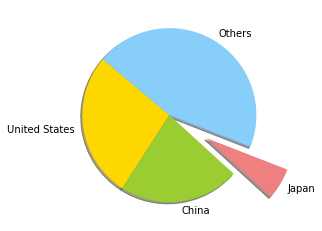

In [264]:
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure()
ax = fig.add_subplot(111)
labels = 'United States', 'China', 'Japan', 'Others'
values = [11.08, 9.15, 2.4, 18.37]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0.5, 0)  # explode 1st slice
plt.plot()

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='', shadow=True, startangle=140)
plt.title=('World Market Share of Movie Industry (by annual consumption)')

plt.show()        
#say its 6% of the pie

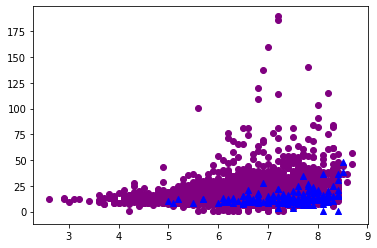

In [132]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig1= plt.figure()

x=range(0,10)
y=range(0,400)
ax1= fig1.add_subplot(111)

ax1.scatter([df_no_outliers['vote_average']],[df_no_outliers['popularity']], c= 'purple')
ax1.scatter([dfja_work['vote_average']],[dfja_work['popularity']], c='b', marker='^')
plt.title='Rating vs. Popularity'
plt.show()

<Figure size 432x288 with 0 Axes>

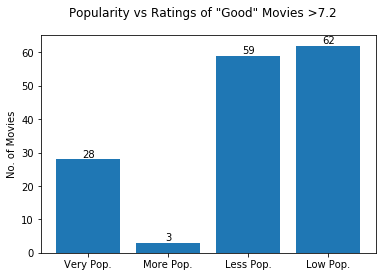

In [92]:
import numpy as np
import matplotlib.pyplot as plt
 
fig=plt.figure()

fig, ax = plt.subplots()
# ax.bar(['Very Pop.', 'More Pop.', 'Less Pop.', 'Low Pop.'],[28, 3, 59, 62])
# ax.plot(['Very Pop.', 'More Pop.', 'Less Pop.', 'Low Pop.'],[7.2,7.1,7.2,7.1], color='red', linewidth=2.0)
ax.bar(['Very Pop.', 'More Pop.', 'Less Pop.', 'Low Pop.'],[28, 3, 59, 62])
ax.set_ylabel('No. of Movies')
rects = ax.patches
# secax = ax.secondary_yaxis('right')
# secax.set_ylabel('Ratings')
# secax.set_yticks([1,2,3,4,5,6,7,8,9,10], minor=True) 
# secax.set_yticklabels((1,5,10))

# Make some labels.
labels = "28", '3', '59', '62' 

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom')
rects1 = ax.patches

plt.suptitle('Popularity vs Ratings of "Good" Movies >7.2')
plt.show()

In [67]:
a=dfja_work.sort_values(by=['release_date'], ascending=False).head(54)
a.sort_values(by='popularity').mean() #the rest of the notebook is work to get 4th graph
#this is the mean 2010's popularity

popularity          12.349685
vote_count         586.555556
video                0.000000
id              291843.555556
vote_average         7.211111
dtype: float64

In [77]:
b=dfja_work.sort_values(by=['release_date'], ascending=False)[55:91]
b.sort_values(by='popularity').mean() #2000's popularity

popularity         14.642111
vote_count        879.027778
video               0.000000
id              13279.222222
vote_average        7.277778
dtype: float64

In [95]:
c=dfja_work.sort_values(by=['release_date'], ascending=False)[91:122]
c.sort_values(by='popularity').mean() #1990's popularity

popularity         14.257194
vote_count        599.258065
video               0.000000
id              23977.096774
vote_average        7.167742
dtype: float64

In [89]:
d=dfja_work.sort_values(by=['release_date'], ascending=False)[123:132]
d.sort_values(by='popularity').mean() #1980's popularity

popularity         17.167333
vote_count       1592.555556
video               0.000000
id              13916.555556
vote_average        7.755556
dtype: float64

<Figure size 432x288 with 0 Axes>

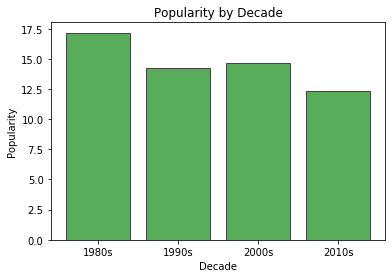

In [130]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig3=plt.figure()
fig3, ax = plt.subplots()
y=[17.17, 14.26, 14.64, 12.35]
plt.bar(r, y ,color='g', edgecolor='k', alpha=0.65)
r=('1980s', '1990s', '2000s', '2010s')
ax.set_ylabel('Popularity')
ax.set_xlabel('Decade')
ax.set_title('Popularity by Decade')
# ax.set_xticks('')
# ax.set_xticklabels(labels)

plt.show()